<a href="https://colab.research.google.com/github/daemonX10/Data-Science/blob/main/visualising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

![architecture](https://www.researchgate.net/profile/Daegyun-Choi/publication/350828239/figure/fig1/AS:1017585780924416@1619622764106/Architecture-of-the-modified-VGG16-model.ppm)

```python
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
```


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='vgg16.pdf',show_layer_activations=True, show_shapes=True, show_layer_names=True)

In [ ]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,biases = model.layers[i].get_weights()
  print('Layer number', i , model.layers[i].name,filters.shape)

Layer number 1 block1_conv1 (3, 3, 3, 64)
Layer number 2 block1_conv2 (3, 3, 64, 64)
Layer number 4 block2_conv1 (3, 3, 64, 128)
Layer number 5 block2_conv2 (3, 3, 128, 128)
Layer number 7 block3_conv1 (3, 3, 128, 256)
Layer number 8 block3_conv2 (3, 3, 256, 256)
Layer number 9 block3_conv3 (3, 3, 256, 256)
Layer number 11 block4_conv1 (3, 3, 256, 512)
Layer number 12 block4_conv2 (3, 3, 512, 512)
Layer number 13 block4_conv3 (3, 3, 512, 512)
Layer number 15 block5_conv1 (3, 3, 512, 512)
Layer number 16 block5_conv2 (3, 3, 512, 512)
Layer number 17 block5_conv3 (3, 3, 512, 512)


In [ ]:
filters,biases = model.layers[1].get_weights()

In [ ]:
filters

array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

In [ ]:
f_min  , f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
filters

array([[[[0.8601116 , 0.6161919 , 0.55114007, ..., 0.4212452 ,
          0.4828852 , 0.5304859 ],
         [0.9545779 , 0.5408773 , 0.6017826 , ..., 0.4582953 ,
          0.4846108 , 0.5538601 ],
         [0.89960235, 0.3896376 , 0.5539096 , ..., 0.42523453,
          0.4852669 , 0.5518304 ]],

        [[0.81635594, 0.65118545, 0.52590066, ..., 0.4087713 ,
          0.340725  , 0.47531587],
         [0.8683965 , 0.5615535 , 0.5647105 , ..., 0.44733417,
          0.2931476 , 0.46953422],
         [0.8437643 , 0.39145148, 0.5206881 , ..., 0.42896524,
          0.30857468, 0.4940327 ]],

        [[0.47662497, 0.63058364, 0.43417358, ..., 0.4150598 ,
          0.22949417, 0.28977698],
         [0.4609779 , 0.5572666 , 0.4450579 , ..., 0.4508793 ,
          0.12949093, 0.22478487],
         [0.4736674 , 0.40397066, 0.41671643, ..., 0.42346177,
          0.16341406, 0.27143562]]],


       [[[0.7392438 , 0.6404719 , 0.6507926 , ..., 0.43525034,
          0.810127  , 0.7901605 ],
         [0.

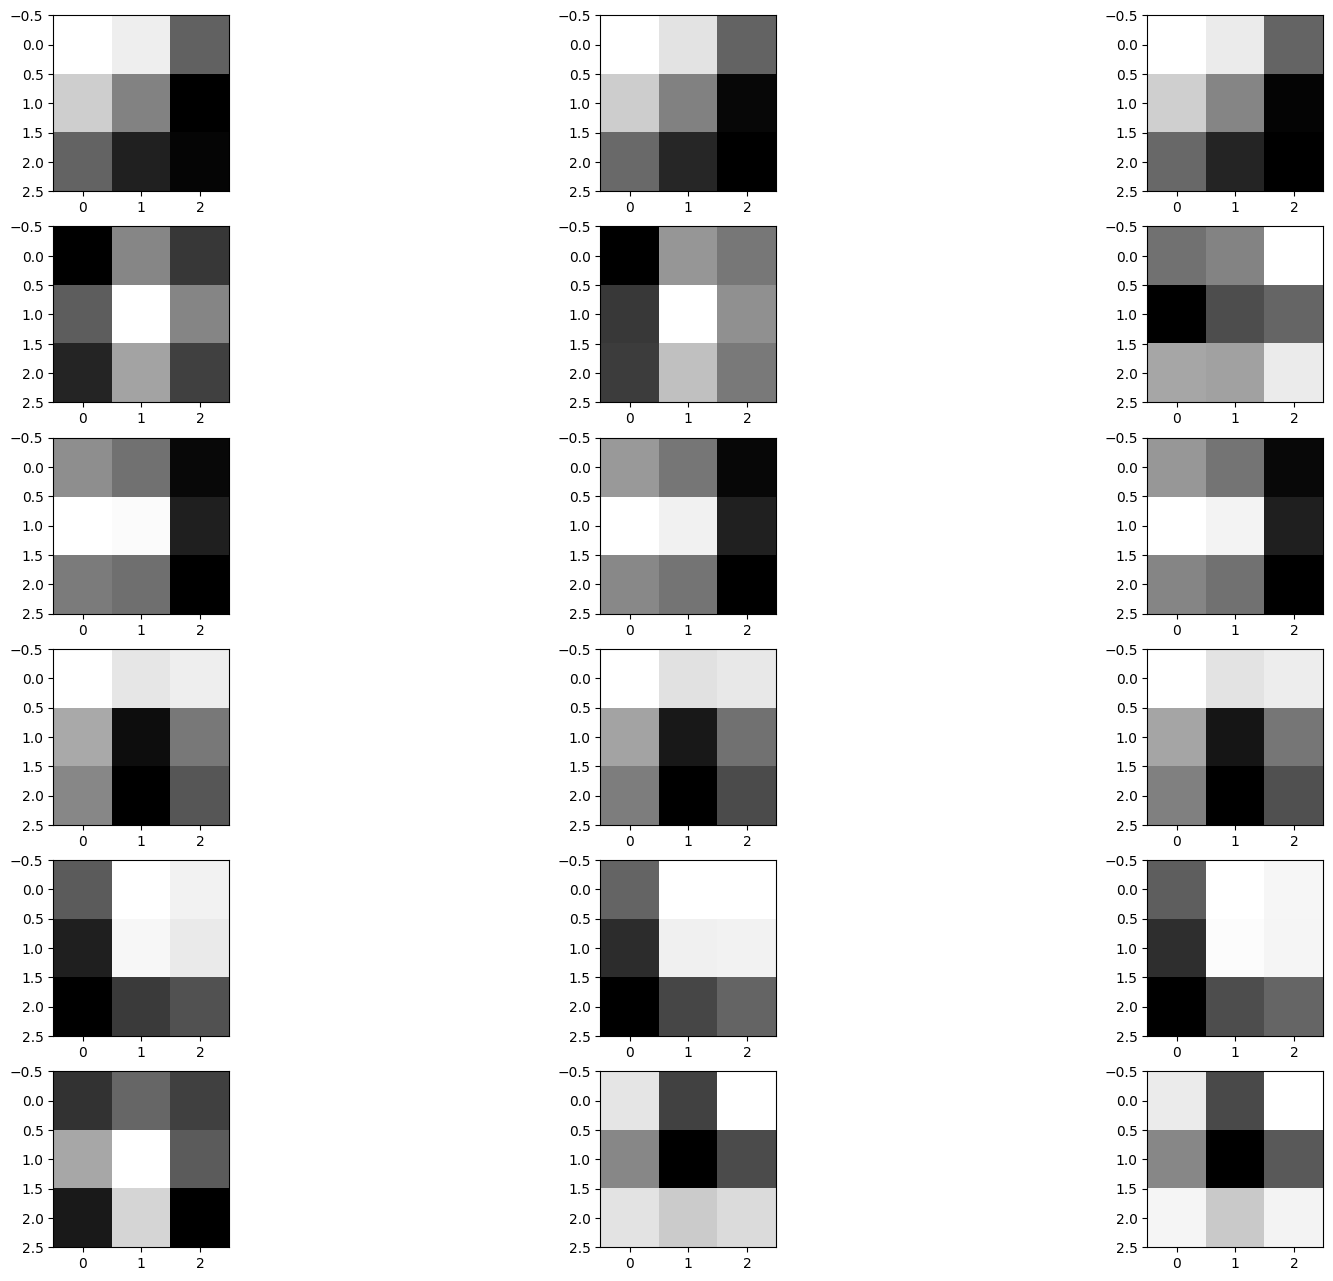

In [ ]:
from matplotlib import pyplot
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(20, 16))
for i in range(n_filters):
  # get the filters
  f = filters[:,:,:,i]
  for j in range(3):
    # subplot for 6 filters and 3 channels
    pyplot.subplot(n_filters, 3, ix)
    pyplot.imshow(f[:, :, j], cmap='gray')
    ix += 1
pyplot.show()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

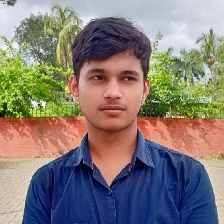

In [ ]:
image = load_img('/content/damodar.jfif', target_size=(224,224))
image

In [ ]:
image = img_to_array(image)

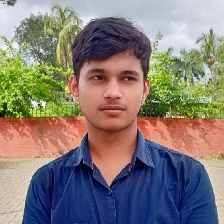

In [ ]:
from keras.preprocessing.image import array_to_img
array_to_img(image)

In [ ]:
import numpy as np


In [ ]:
image = np.expand_dims(image,axis = 0)

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
image = preprocess_input(image)

In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [ ]:
# prompt: what preprocess_input function in keras do

# The `preprocess_input` function in Keras is used to pre-process an image before feeding it to a convolutional neural network. It performs the following operations:

# * Subtracts the mean RGB value from each pixel in the image.
# * Scales the pixel values to a range of [0, 1].

# This pre-processing step is important because it helps the neural network to converge faster and learn more effectively.

# Here is an example of how to use the `preprocess_input` function:



(1, 224, 224, 3)

In [ ]:
#calculating features_map
features = model.predict(image)

features.shape

1/1 [==============================] - 0s 62ms/step


(1, 224, 224, 64)

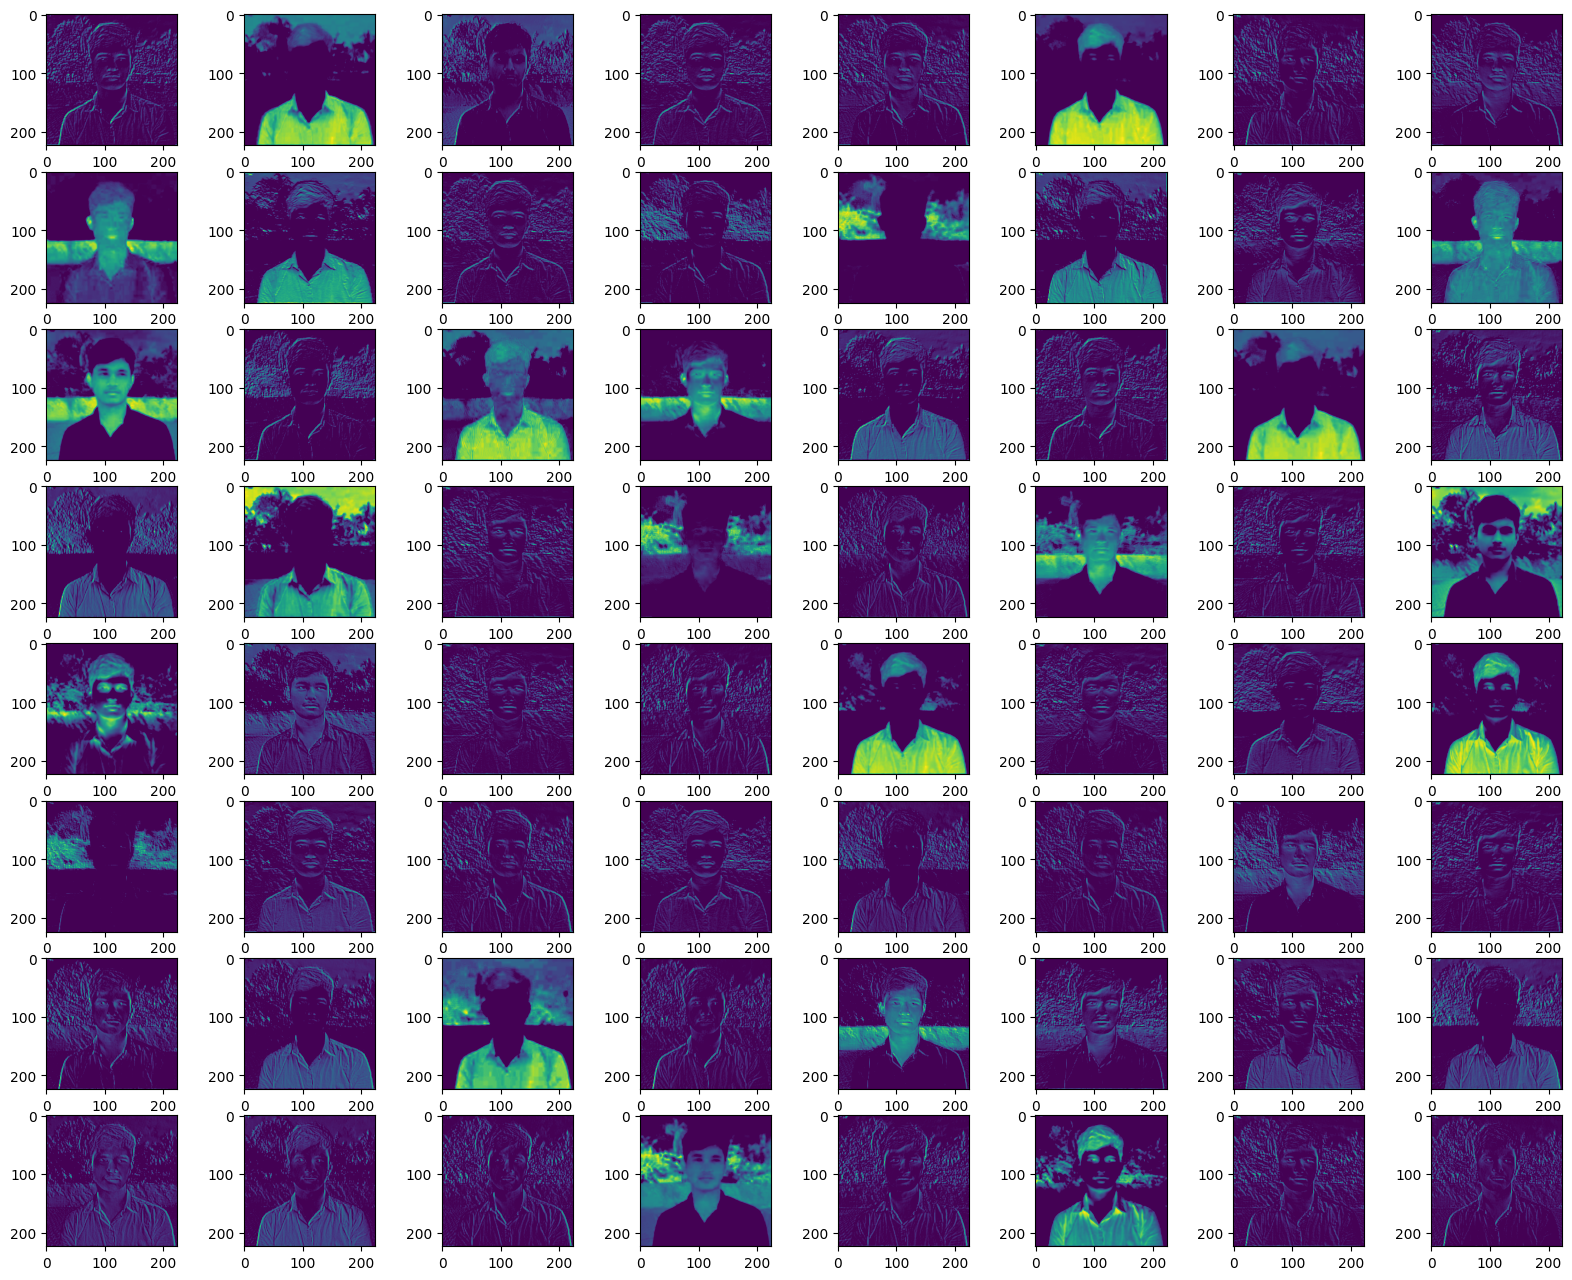

In [ ]:
fig = pyplot.figure(figsize=(20, 16))
for i in range(1,features.shape[3]+1):
  pyplot.subplot(8,8,i)
  pyplot.imshow(features[0,:,:,i-1])
pyplot.show()

In [ ]:
model2 = VGG16()


In [ ]:
layer_index = [2,5,9,13,17]
outputs = [model2.layers[i].output for i in layer_index]
model3 = Model(inputs=model2.inputs, outputs=outputs)


In [ ]:
features = model.predict(image)
features.shape

1/1 [==============================] - 0s 54ms/step


(1, 224, 224, 64)

1/1 [==============================] - 1s 868ms/step


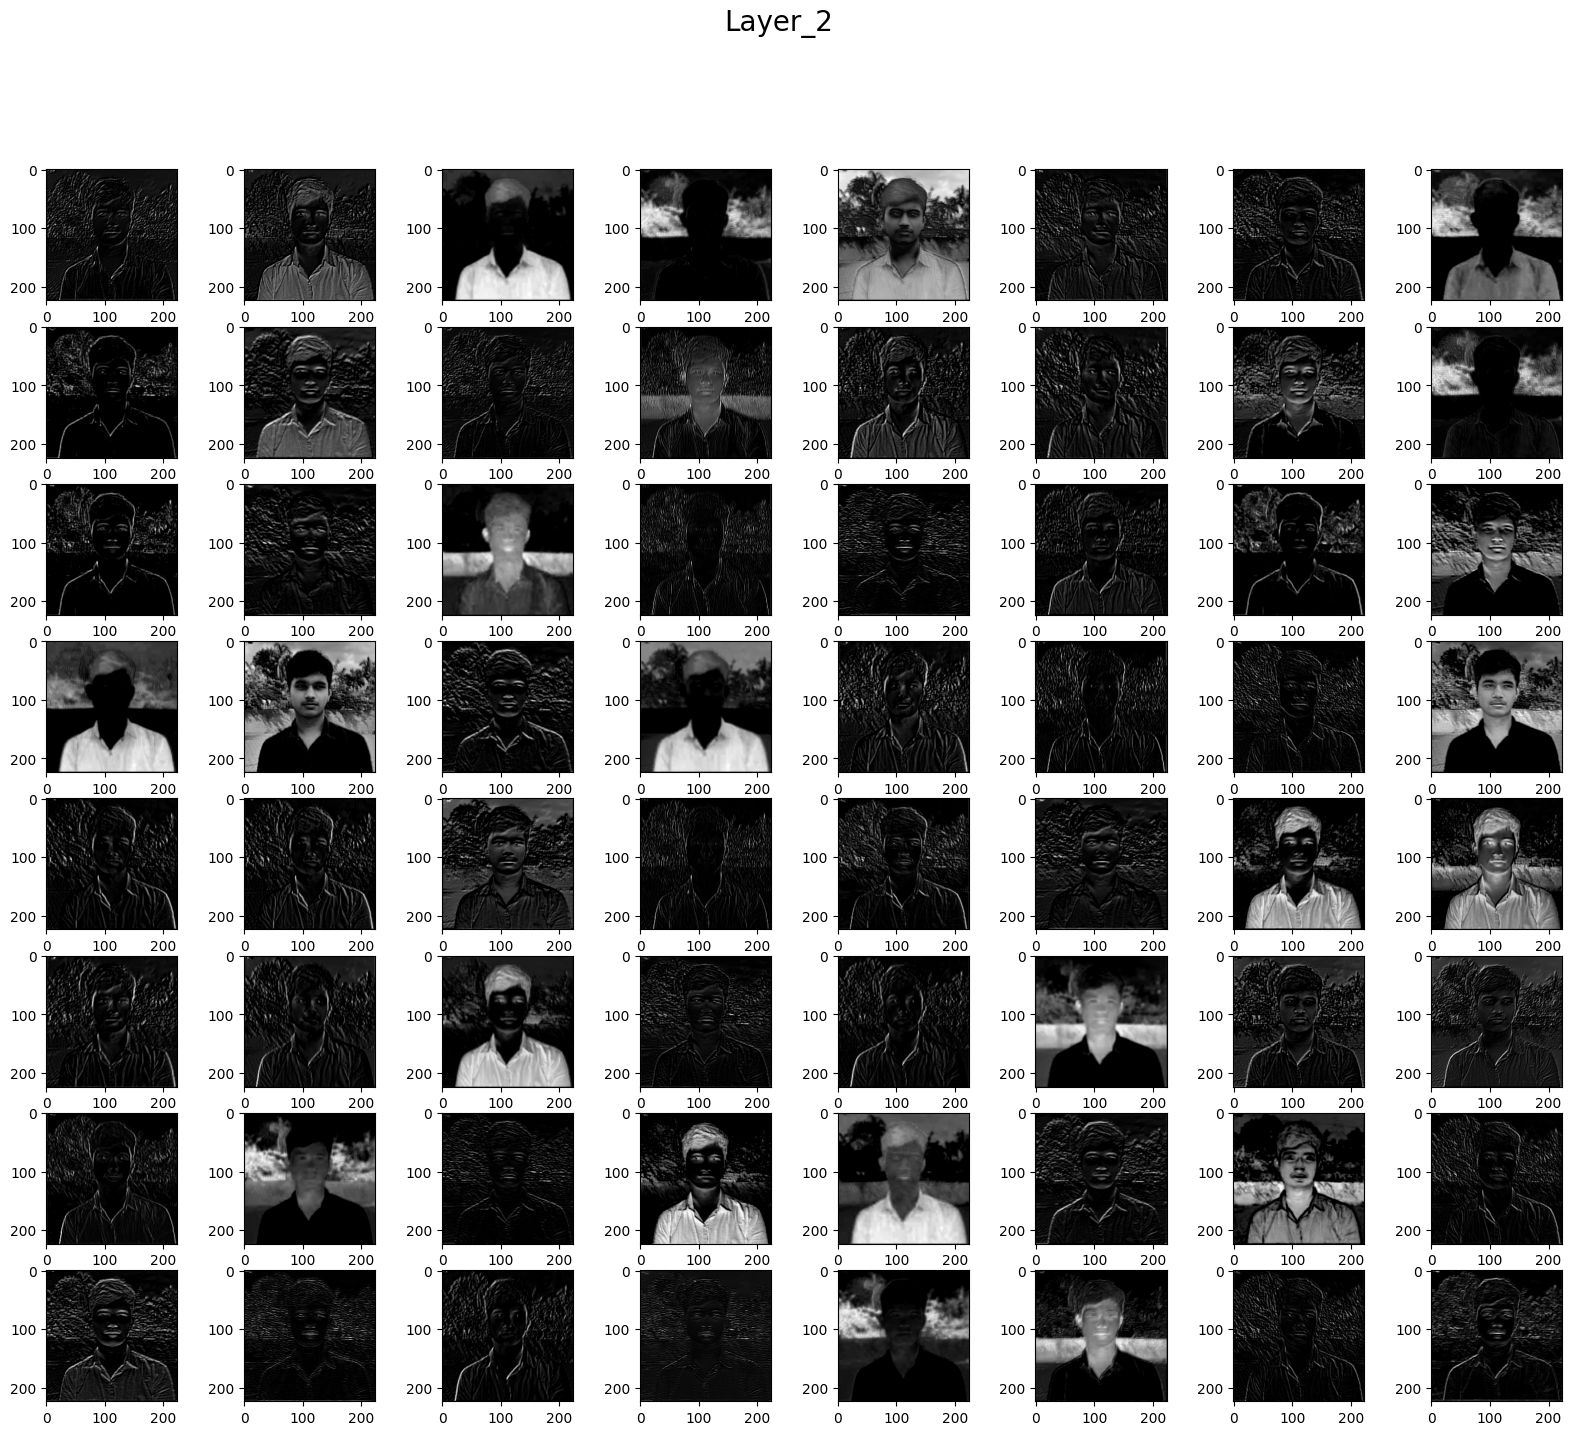

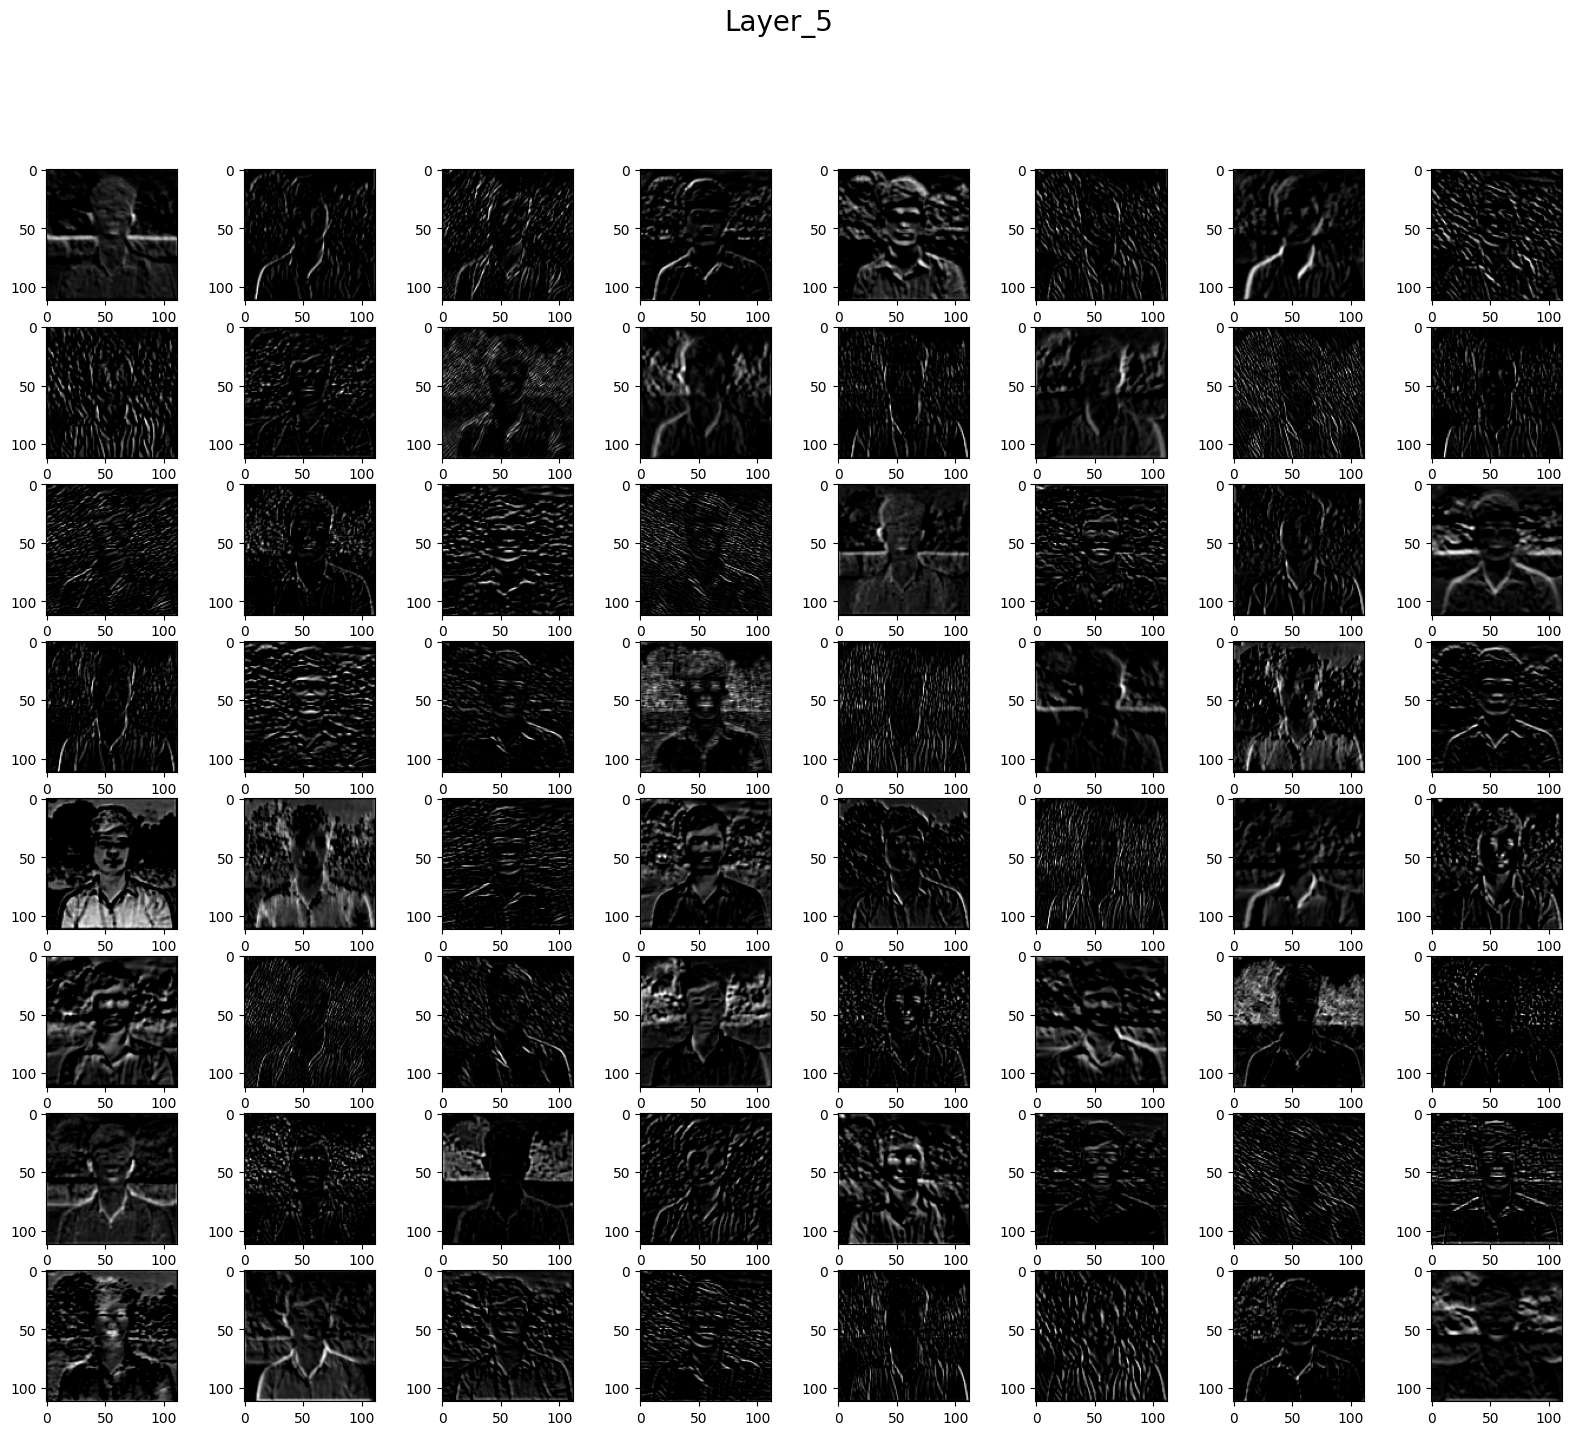

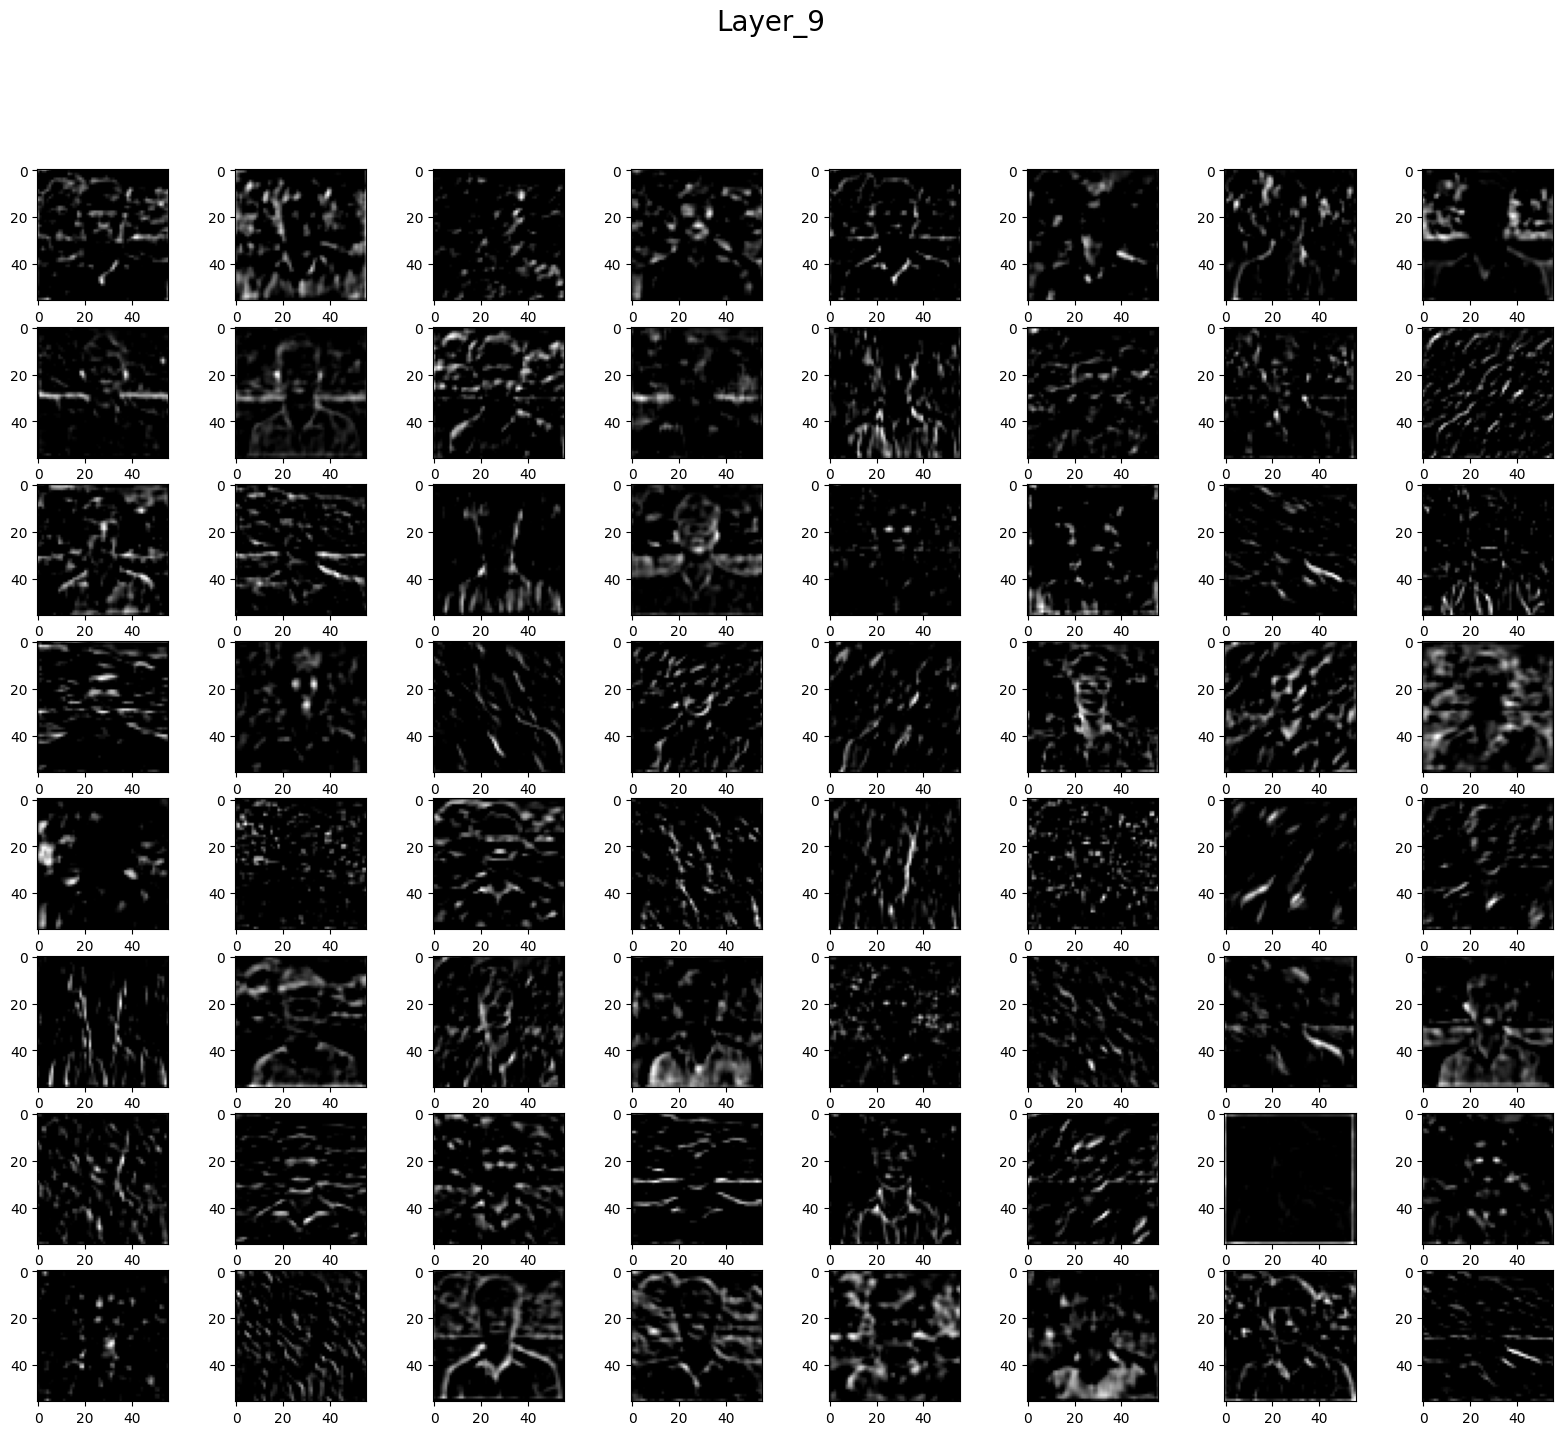

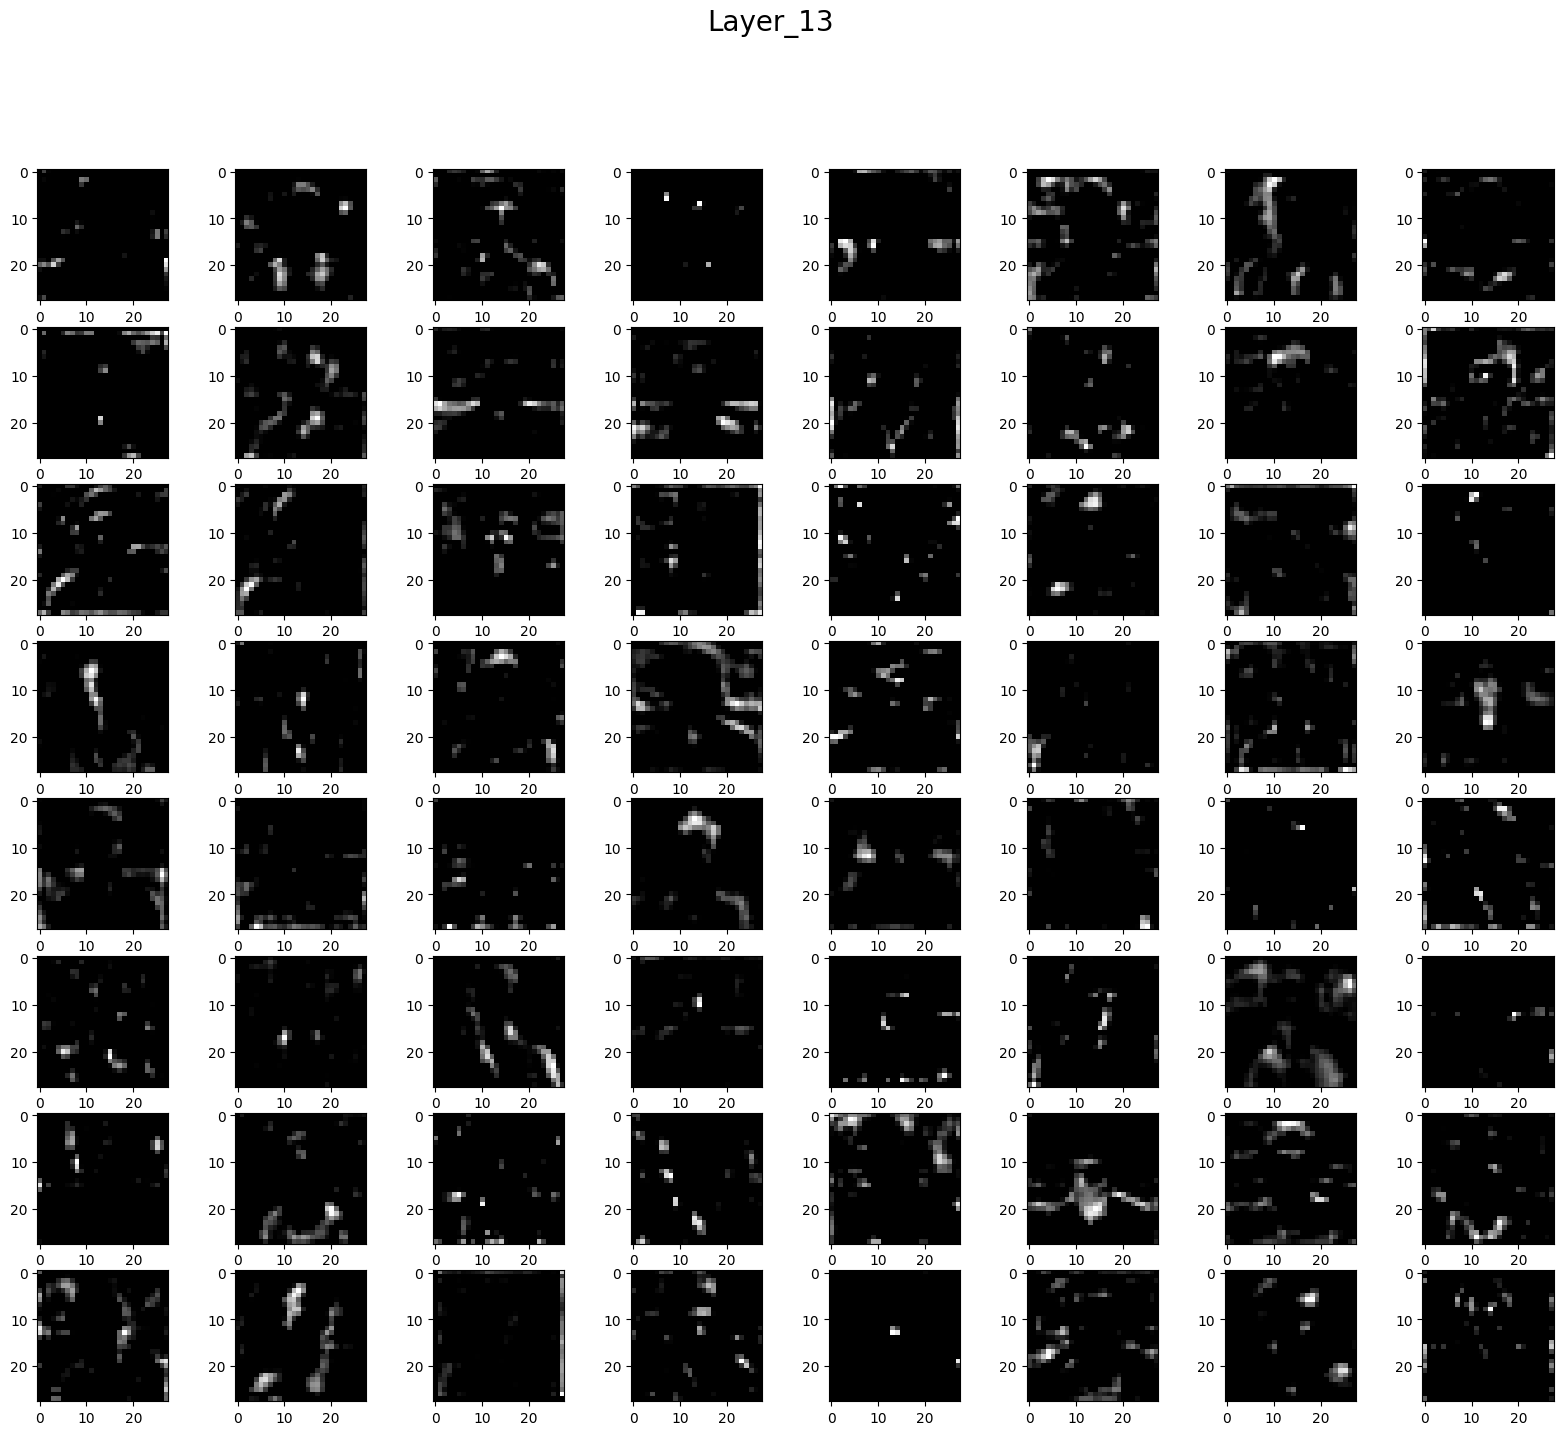

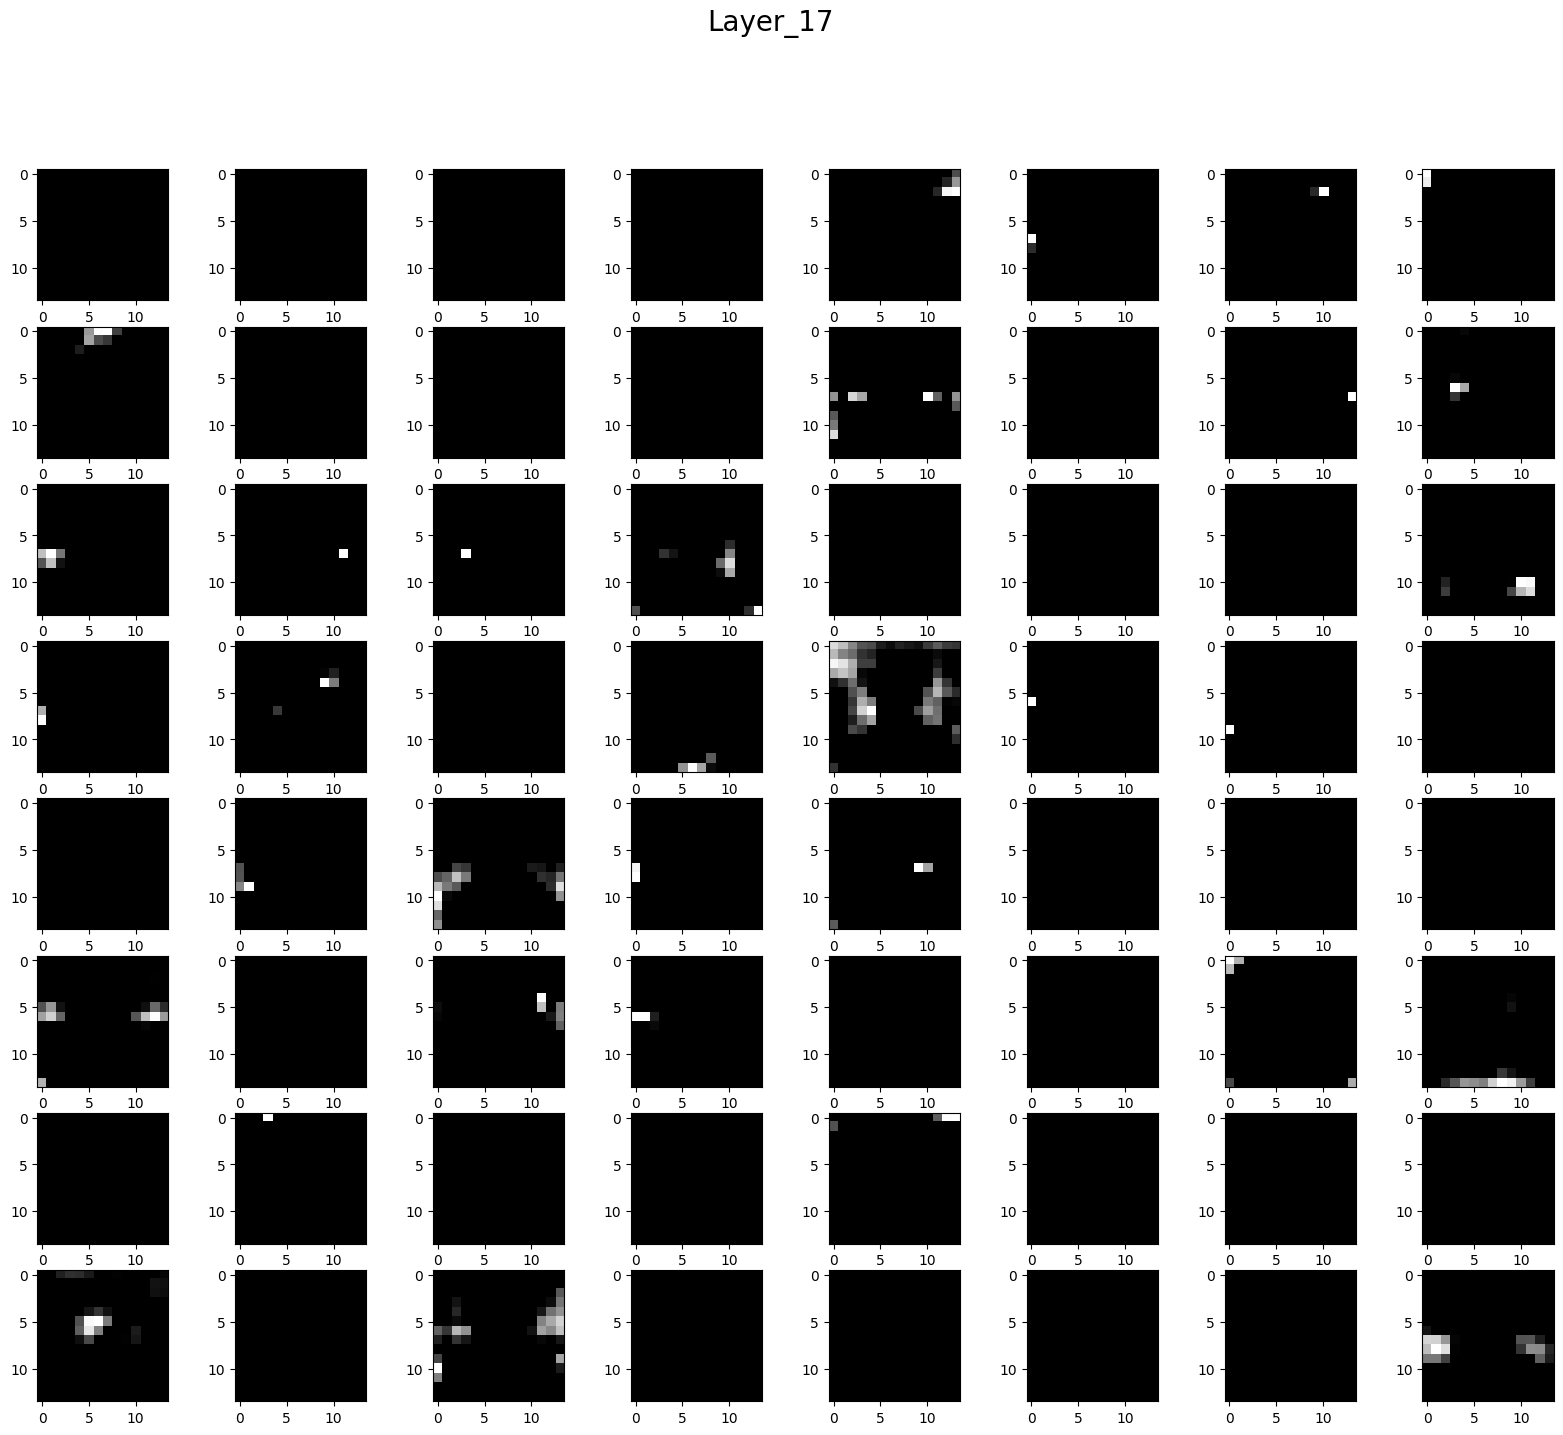

In [ ]:
features_map = model3.predict(image)
for i , fmap in zip(layer_index,features_map):
  fig = pyplot.figure(figsize=(20, 16))
  fig.suptitle("Layer_{}".format(i),fontsize=20)
  for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(fmap[0,:,:,i-1],cmap='gray')
  pyplot.show()